In [1]:
import pandas as pd
import requests
import io
import shapely
import matplotlib.pyplot as plt
import urllib
import numpy as np

## Data source 
https://www.opendataphilly.org/dataset/vehicular-crash-data/resource/d920c370-464c-4961-bdd0-1a071335750e
## Metadata
http://metadata.phila.gov/#home/datasetdetails/5543865420583086178c4eba/representationdetails/5c410c6431621f086214c7cd/?view_287_per_page=25&view_287_page=1

In [28]:
url ='https://phl.carto.com/api/v2/sql?q=SELECT+*+FROM+crash_data_collision_crash_2007_2017&filename= \
        crash_data_collision_crash_2007_2017&format=csv&skipfields=cartodb_id,the_geom,the_geom_webmercator'
s = requests.get(url).content

In [40]:
# read the data into a pandas dataframe
data=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [66]:
# export the raw data into a csv file
data.to_csv('Data/raw_data.csv')

In [67]:
data.head()

,wz_ln_closure,objectid_1,crn,district,county,municipality,crash_year,crash_month,day_of_week,time_of_day,...,bicycle_maj_inj_count,ped_count,ped_death_count,ped_maj_inj_count,max_severity_level,comm_veh_count,dec_lat,dec_long,rdwy_surf_type_cd,county_name
0,NaN,9498,2016019772,6,67,67301,2016,2,2,1515,...,0,1,0,0,3,0,40.0628,-75.0577,NaN,NaN
1,NaN,9570,2016013724,6,67,67301,2016,1,3,1100,...,0,0,0,0,3,0,40.0822,-74.9669,NaN,NaN
2,NaN,9642,2016038282,6,67,67301,2016,3,5,632,...,0,0,0,0,0,1,39.9751,-75.1946,NaN,NaN
3,NaN,9714,2016052220,6,67,67301,2016,2,5,1900,...,0,0,0,0,8,0,40.0357,-75.2171,NaN,NaN
4,NaN,9786,2016087187,6,67,67301,2016,8,6,1535,...,0,1,0,0,4,0,39.9511,-75.1721,NaN,NaN


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77462 entries, 0 to 77461
Data columns (total 90 columns):
wz_ln_closure            1031 non-null object
objectid_1               77462 non-null int64
crn                      77462 non-null int64
district                 77462 non-null int64
county                   77462 non-null int64
municipality             77462 non-null int64
crash_year               77462 non-null int64
crash_month              77462 non-null int64
day_of_week              77462 non-null int64
time_of_day              77462 non-null int64
hour_of_day              77462 non-null int64
illumination             77462 non-null int64
weather                  77462 non-null int64
road_condition           77462 non-null int64
collision_type           77462 non-null int64
relation_to_road         77462 non-null int64
work_zone_type           1100 non-null object
work_zone_loc            1100 non-null object
work_zone_ind            77462 non-null object
intersect_type  

In [69]:
for c in data.columns:
    print(c, ': ', data[str(c)].dtype)

wz_ln_closure :  object
objectid_1 :  int64
crn :  int64
district :  int64
county :  int64
municipality :  int64
crash_year :  int64
crash_month :  int64
day_of_week :  int64
time_of_day :  int64
hour_of_day :  int64
illumination :  int64
weather :  int64
road_condition :  int64
collision_type :  int64
relation_to_road :  int64
work_zone_type :  object
work_zone_loc :  object
work_zone_ind :  object
intersect_type :  int64
tcd_type :  int64
location_type :  int64
urban_rural :  int64
fatal_count :  int64
injury_count :  int64
person_count :  int64
total_units :  int64
sch_bus_ind :  object
sch_zone_ind :  object
latitude :  object
longitude :  object
arrival_tm :  int64
cons_zone_spd_lim :  object
dispatch_tm :  int64
est_hrs_closed :  object
lane_closed :  int64
ln_close_dir :  object
ntfy_hiwy_maint :  object
spec_juris_cd :  object
tcd_func_cd :  int64
tfc_detour_ind :  object
workers_pres :  object
wz_close_detour :  object
wz_flagger :  object
wz_law_offcr_ind :  object
objectid :

In [70]:
# print the unique values in each column that contains object type
for c in data.columns:
    if data[str(c)].dtype == 'object':
        print(data[str(c)].unique())

[nan 'N' 'Y' 'U']
[nan '1' '2' '8' '3']
[nan '4' '2' '5' '8' '1' '3']
['N' 'Y']
['N' 'Y' nan]
['N' nan 'Y']
['40 03:45.914' '40 04:55.794' '39 58:30.439' ... '40 00:07.660'
 '40 00:55.055' '39 52:55.210']
['75 03:27.576' '74 58:00.797' '75 11:40.428' ... '75 10:04.065'
 '75 04:04.781' '75 14:43.780']
[nan '50' '45' '55' '99' '90' '25' '35' '5' '20' '30' '40' '05' '15' '00'
 '10']
[nan '2' '1' '4' '9' '3' '5' '6']
[nan '3' '1' '2' '7' '4' '6' '5']
['N' nan 'Y']
[nan '0' '9' '4']
[nan 'N' 'Y' 'U']
[nan 'N' 'Y' 'U']
[nan 'N' 'Y' 'U']
[nan 'N' 'U' 'Y']
[nan 'N' 'U' 'Y']
[nan 'Y' 'N' 'U']
[nan 'N' 'Y' 'U']
[nan 'Y' 'N' 'U']
[nan '2' '1' '9' '3']
[nan 'Philadelphia' 'Montgomery' 'Bucks' 'Northumberland']


### Many of the columns contain some empty strings. These will need to be converted to nan values. Also, some of the columns contain strings with numeric values. These may need to be converted to int or float type. 

In [71]:
# Create a function to replace empty string with NaN
def replace_empty_strings(df):
    for c in df.columns:
        df[str(c)].replace(' ', np.nan, inplace=True)
    return df

In [72]:
df = replace_empty_strings(data)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77462 entries, 0 to 77461
Data columns (total 90 columns):
wz_ln_closure            1031 non-null object
objectid_1               77462 non-null int64
crn                      77462 non-null int64
district                 77462 non-null int64
county                   77462 non-null int64
municipality             77462 non-null int64
crash_year               77462 non-null int64
crash_month              77462 non-null int64
day_of_week              77462 non-null int64
time_of_day              77462 non-null int64
hour_of_day              77462 non-null int64
illumination             77462 non-null int64
weather                  77462 non-null int64
road_condition           77462 non-null int64
collision_type           77462 non-null int64
relation_to_road         77462 non-null int64
work_zone_type           1100 non-null object
work_zone_loc            1100 non-null object
work_zone_ind            77462 non-null object
intersect_type  

In [74]:
df.head()

,wz_ln_closure,objectid_1,crn,district,county,municipality,crash_year,crash_month,day_of_week,time_of_day,...,bicycle_maj_inj_count,ped_count,ped_death_count,ped_maj_inj_count,max_severity_level,comm_veh_count,dec_lat,dec_long,rdwy_surf_type_cd,county_name
0,NaN,9498,2016019772,6,67,67301,2016,2,2,1515,...,0,1,0,0,3,0,40.0628,-75.0577,NaN,NaN
1,NaN,9570,2016013724,6,67,67301,2016,1,3,1100,...,0,0,0,0,3,0,40.0822,-74.9669,NaN,NaN
2,NaN,9642,2016038282,6,67,67301,2016,3,5,632,...,0,0,0,0,0,1,39.9751,-75.1946,NaN,NaN
3,NaN,9714,2016052220,6,67,67301,2016,2,5,1900,...,0,0,0,0,8,0,40.0357,-75.2171,NaN,NaN
4,NaN,9786,2016087187,6,67,67301,2016,8,6,1535,...,0,1,0,0,4,0,39.9511,-75.1721,NaN,NaN


In [9]:
# Create a dataframe with only the vehicle type data
vehicle_data = df[['automobile_count', 'motorcycle_count', 'bus_count', 'small_truck_count',
                  'heavy_truck_count', 'suv_count', 'van_count', 'bicycle_count']]

In [11]:
vehicle_data.head()

,automobile_count,motorcycle_count,bus_count,small_truck_count,heavy_truck_count,suv_count,van_count,bicycle_count
0,1,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0


In [12]:
# Create a list of vehicle types for labels on the plot
v_types = [c.split('_')[0] if c.split('_')[1]=='count' 
           else c.split('_')[0] + ' ' + c.split('_')[1] for c in vehicle_type_data.columns]

In [60]:
vehicle_sums = [vehicle_type_data[c].sum() for c in vehicle_type_data.columns]
vehicle_sums

[91222, 2042, 1812, 9327, 2960, 29323, 9216, 3537]

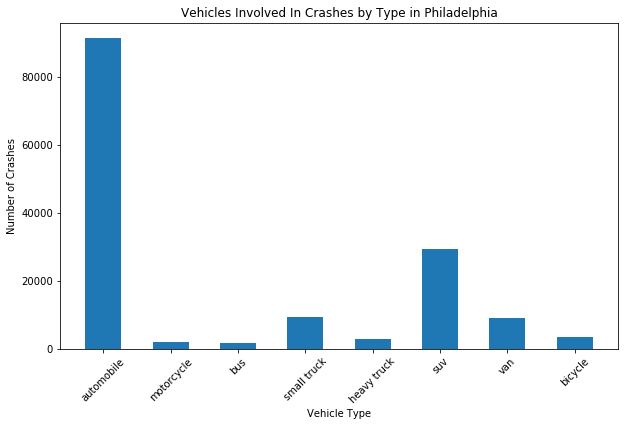

In [90]:
height = vehicle_sums
bars = v_types
y_pos = 1.5*np.arange(len(bars))
plt.figure(figsize = (10, 6))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars, rotation=45)
plt.title('Vehicles Involved In Crashes by Type in Philadelphia')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Crashes')

plt.show()